In [3]:
import seaborn as sns
penguins = sns.load_dataset('penguins')

In [4]:
df = penguins.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


---
1. 범주형 속성만을 선택하여 속성 별로 가장 빈번한 값과 빈도를 확인하시오. (10점)
- 'species'
  - Adelie       152
- 'island'
  - Biscoe       168
- 'sex'
  - Male      168



In [8]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['species', 'island', 'sex'], dtype='object')

In [9]:
df[cat_cols].describe()

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [10]:
#df[cat_cols].value_counts()
print(df['species'].value_counts())
print(df['island'].value_counts())
print(df['sex'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
Male      168
Female    165
Name: count, dtype: int64


---
2. 수치형 속성만을 선택하여 Z점수 표준화를 적용하시오. (20점)

In [11]:
def z_std(df):
  return (df - df.mean()) / df.std()

In [12]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [ ]:
df[num_cols].apply(z_std)

In [ ]:
z_std(df[num_cols])

In [14]:
df[num_cols] = z_std(df[num_cols])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883205,0.784300,-1.416272,-0.563317,Male
1,Adelie,Torgersen,-0.809939,0.126003,-1.060696,-0.500969,Female
2,Adelie,Torgersen,-0.663408,0.429833,-0.420660,-1.186793,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,-1.322799,1.088129,-0.562890,-0.937403,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,0.527159,-1.443781,1.001641,0.808332,Female
341,Gentoo,Biscoe,1.186550,-0.734846,1.499447,1.930590,Male
342,Gentoo,Biscoe,0.234097,-1.190590,0.788296,1.244766,Female


---
3. 수치형 속성 중 누락값이 있는지 확인하고 누락값을 열 별 중앙값으로 채우는 전처리를 하시오 (10점)

In [15]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
df[num_cols].median()

,0
bill_length_mm,0.096724
bill_depth_mm,0.075365
flipper_length_mm,-0.278430
body_mass_g,-0.189231


In [ ]:
df[num_cols]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.883205,0.784300,-1.416272,-0.563317
1,-0.809939,0.126003,-1.060696,-0.500969
2,-0.663408,0.429833,-0.420660,-1.186793
3,0.096724,0.075365,-0.278430,-0.189231
4,-1.322799,1.088129,-0.562890,-0.937403
...,...,...,...,...
339,0.096724,0.075365,-0.278430,-0.189231
340,0.527159,-1.443781,1.001641,0.808332
341,1.186550,-0.734846,1.499447,1.930590
342,0.234097,-1.190590,0.788296,1.244766


In [17]:
df = df.fillna(df[num_cols].median())

In [18]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,11


In [ ]:
# 1개씩 하기
df.fillna(df.median())

TypeError: could not convert string to float: 'Adelie'

In [19]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883205,0.784300,-1.416272,-0.563317,Male
1,Adelie,Torgersen,-0.809939,0.126003,-1.060696,-0.500969,Female
2,Adelie,Torgersen,-0.663408,0.429833,-0.420660,-1.186793,Female
3,Adelie,Torgersen,0.096724,0.075365,-0.278430,-0.189231,NaN
4,Adelie,Torgersen,-1.322799,1.088129,-0.562890,-0.937403,Female


In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
df.fillna(df[num_cols].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,11


---
4. 펭귄 종(species) 별 데이터의 건수가 균등분포를 이루는지 확인하기 위한 시각화를 하시오. (20점)

In [21]:
df2 = df.groupby('species')['island'].count().reset_index().rename(columns={'island':'count'})
df2


,species,count
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


<Axes: xlabel='species', ylabel='count'>

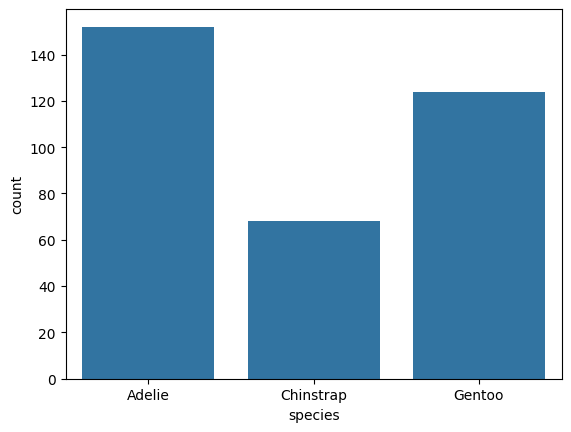

In [22]:
sns.barplot(x = 'species', y = 'count', data = df2)

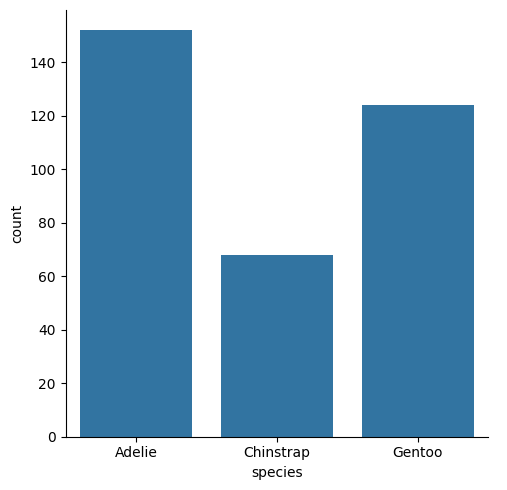

In [23]:
sns.catplot(x = 'species',
            kind = 'count',     # 빈도 막대그래프 그리기
            data = df)

<Axes: xlabel='species', ylabel='Count'>

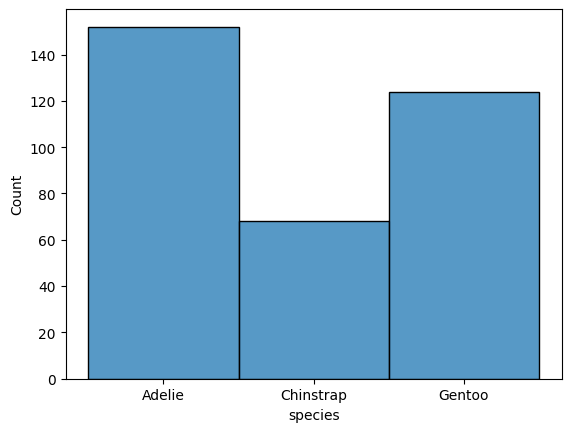

In [ ]:
sns.histplot(x = 'species', data = df)

---
5. 펭귄 종(species) 별, 서식하는 지역(island) 별 발갈퀴의 길이(flipper_length_mm) 평균을 표로 정리하시오. (20점)

In [ ]:
df.groupby(['species', 'island'])['flipper_length_mm'].mean()

species    island   
Adelie     Biscoe      -0.861897
           Dream       -0.795284
           Torgersen   -0.683239
Chinstrap  Dream       -0.362095
Gentoo     Biscoe       1.145592
Name: flipper_length_mm, dtype: float64

---
6. 세 종류의 펭귄 종(species) 각각에 대하여 체중(body_mass_g)의 이상치가 있는지 시각화하시오. (20점)

In [46]:
def outlier(col_name):
  df2 = df[df['species'] == col_name]

  q3, q1 = df2['body_mass_g'].quantile([0.75, 0.25])

  IQR = q3 - q1
  ub = q3 + (1.5 * IQR)
  lb = q1 - (1.5 * IQR)
  # print(q3, q1, IQR, ub, lb)

  cond1 = df2['body_mass_g'] < lb
  cond2 = df2['body_mass_g'] > ub

  return df2['body_mass_g'][cond1 | cond2]

In [47]:
print('Adelie : ', outlier('Adelie').size, outlier('Adelie'))
print('Chinstrap : ', outlier('Chinstrap').size, outlier('Chinstrap'))
print('Gentoo : ', outlier('Gentoo').size, outlier('Gentoo'))

Adelie :  0 Series([], Name: body_mass_g, dtype: float64)
Chinstrap :  2 189    0.745984
190   -1.872618
Name: body_mass_g, dtype: float64
Gentoo :  0 Series([], Name: body_mass_g, dtype: float64)


<Axes: xlabel='species', ylabel='body_mass_g'>

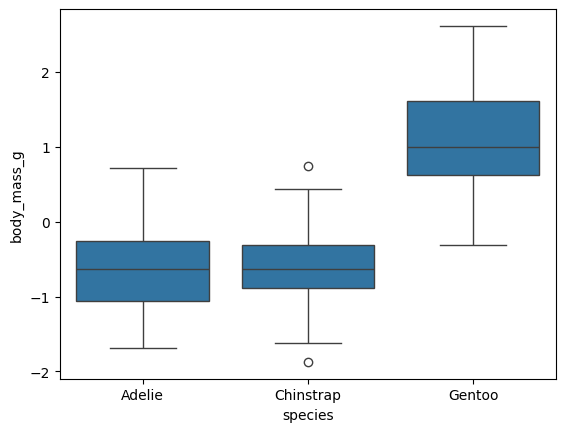

In [30]:
sns.boxplot(data = df, x = 'species', y = 'body_mass_g')

In [35]:
df.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,-0.621973,0.571008,-1.685575,-1.062098,-0.625664,-0.251578,0.714811
Chinstrap,68.0,-0.584405,0.479248,-1.872618,-0.890642,-0.625664,-0.313926,0.745984
Gentoo,124.0,1.079846,0.636504,-0.313926,0.621289,0.995375,1.618852,2.616415
